# Airline on-time Performance Analysis

In this project, we are going to perform data analysis on Airline on-time performance for specific year of 2003 by using data expo 2009 flight dataset from [Kaggle](https://www.kaggle.com/datasets/wenxingdi/data-expo-2009-airline-on-time-data/data?select=1993.csv). 

## Objective

The objective of this analysis are:
1) To identify delay patterns of time of day, weeks, months or season and determine the best performance.
2) To rank top causes of delay and measure how each cause affects the delay in airline performance.
3) To identify the main reasons of flight cancellations.
4) To identify routes, airlines or specific flights that frequently experience delays or cancellations.
4) To analyze the underlying reasons for airlines' poor performance.

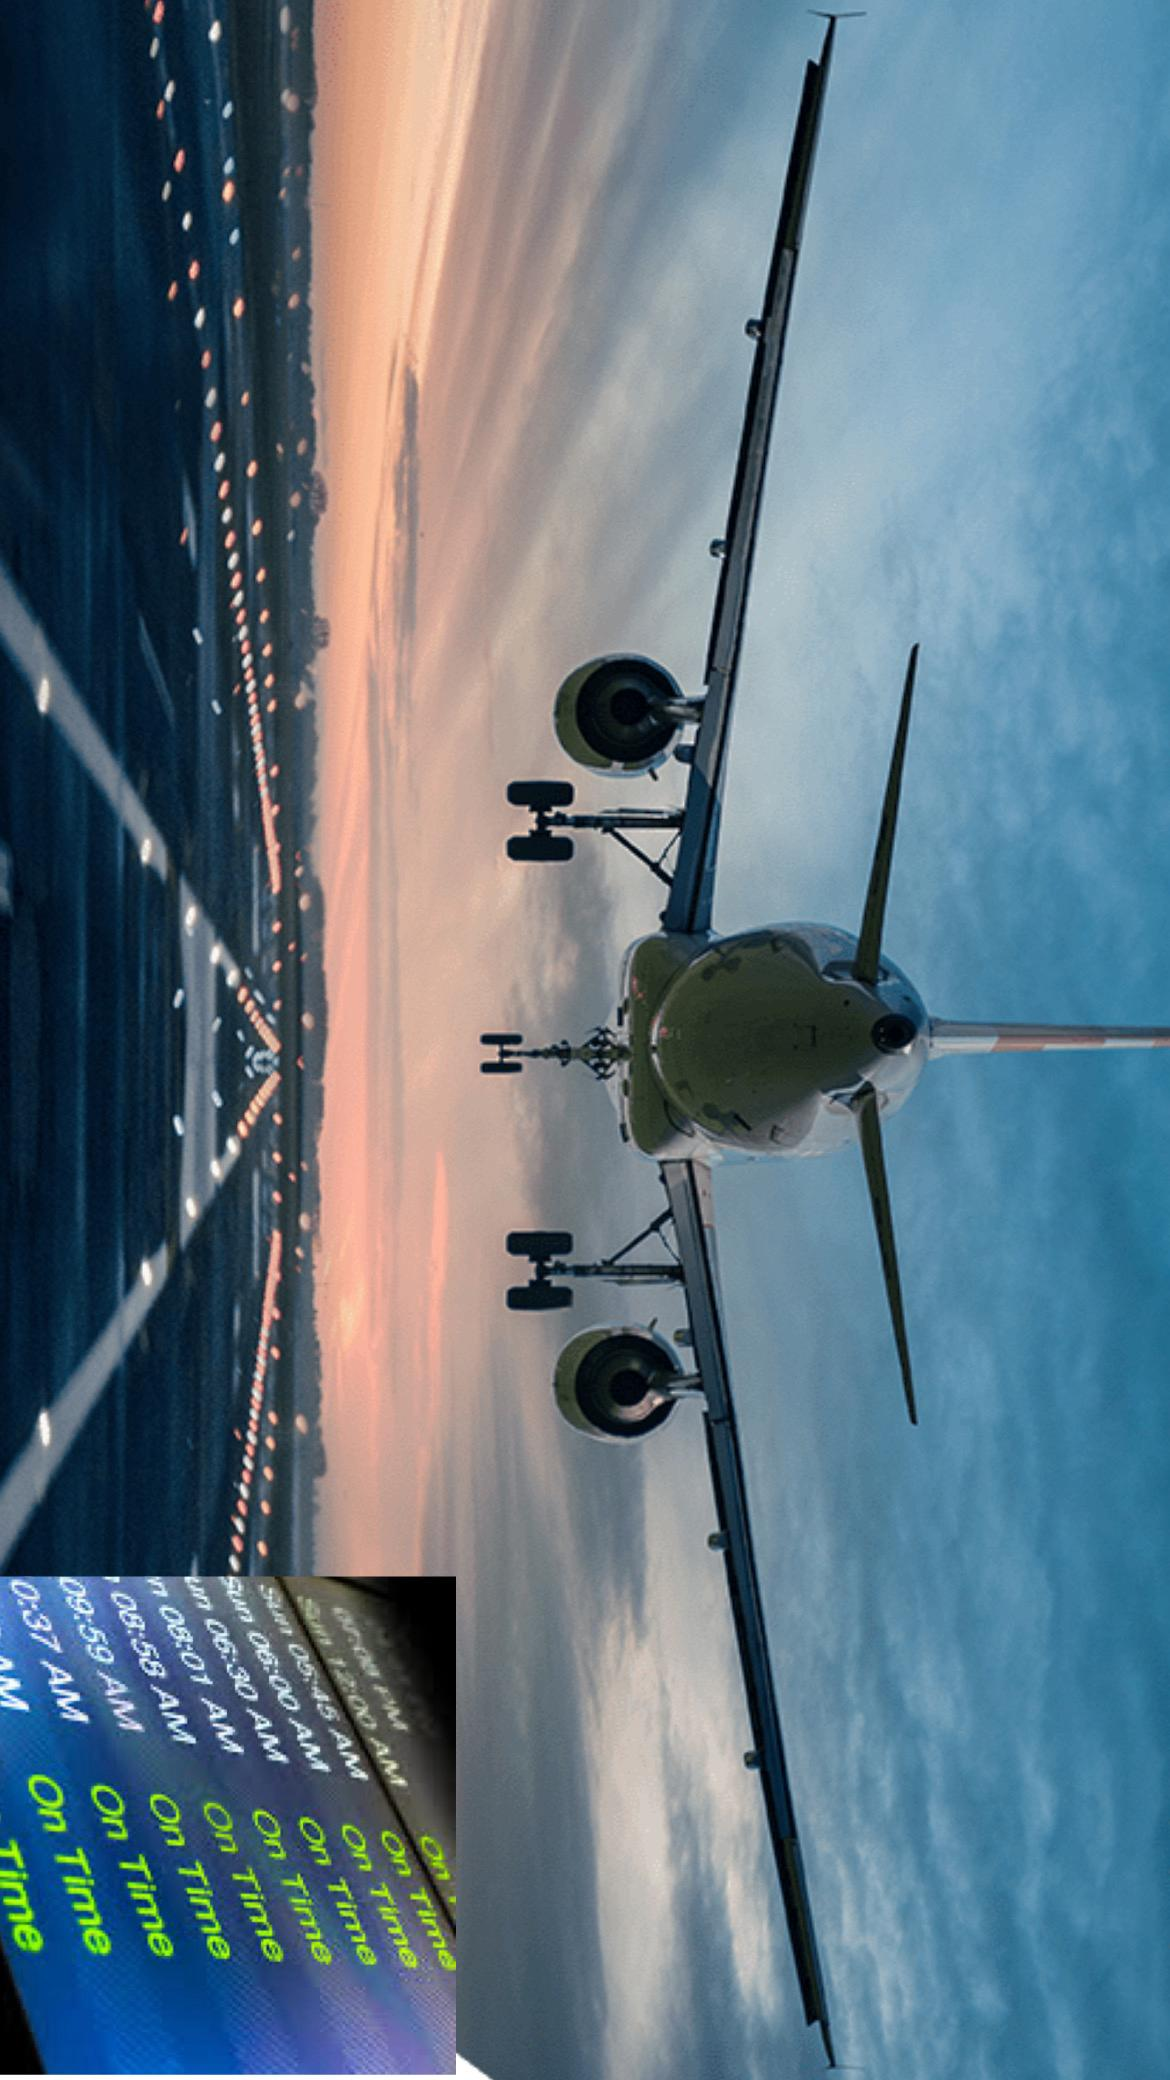

In [ ]:
from IPython.display import Image
Image('airlines.jpeg')

Photo by IGT Solutions Pvt. Ltd.

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| Year                  | 1987–2008                                                                   |int          |
| Month                 | 12–Jan                                                                      |string       |
| DayofMonth            | 31–Jan                                                                      |string       |
| DayOfWeek             | 1 (Monday) – 7 (Sunday)                                                     |int          |
| DepTime               | actual departure time (local, hhmm)                                         |int          |
| CRSDepTime            | scheduled departure time (local, hhmm)                                      |int          |
| ArrTime               | actual arrival time (local, hhmm)                                           |int          |
| CRSArrTime            | scheduled arrival time (local, hhmm)                                        |int          |
| UniqueCarrier         | unique carrier code                                                         |int          |
| FlightNum             | flight number                                                               |int          |
| TailNum               | plane tail number                                                           |int          |
| ActualElapsedTime     | in minutes                                                                  |int          |
| CRSElapsedTime        | in minutes                                                                  |int          |
| AirTime               | in minutes                                                                  |int          |
| ArrDelay              | arrival delay, in minutes                                                   |int          |
| DepDelay              | departure delay, in minutes                                                 |int          |
| Origin                | origin IATA airport code                                                    |string       |
| Dest                  | destination IATA airport code                                               |string       |
| Distance              | in miles                                                                    |int          |
| TaxiIn                | taxi in time, in minutes                                                    |int          |
| TaxiOut               | taxi out time, in minutes                                                   |int          |
| Cancelled             | was the flight cancelled?                                                   |bool         |
| CancellationCode      | reason for cancellation (A = carrier, B = weather, C = NAS, D = security)   |string       |
| Diverted              | 1 = yes, 0 = no                                                             |bool         |
| CarrierDelay          | in minutes                                                                  |int          |
| WeatherDelay          | in minutes                                                                  |int          |
| NASDelay              | in minutes                                                                  |int          |
| SecurityDelay         | in minutes                                                                  |int          |
| LateAircraftDelay     | in minutes                                                                  |int          |

***Table 1*: Flight Data `data`**

---

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| code                  | Carrier Code                                                                |string       |
| description           | Carrier Name                                                                |string       |

***Table 2*: Carrier Data / Airline `carriers`**

---

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| airport                  | Airport Name                                                             |string       |
| city                     | Airport City                                                             |string       |
| country                  | Airport Country                                                          |string       |
| iata                     | Airport Code                                                             |string       |
| lat                      | Aiport Latitude                                                          |float        |
| long                     | Airport Longitude                                                        |float        |
| state                    | Airport State                                                            |string       |

***Table 3*: Airport Data `airports`**

---

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| tailnum               | Aircraft Tail Number                                                        |string       |
| type                  | Usage Type                                                                  |string       |
| manufacturer          | Manufacturer Company                                                        |string       |
| issue_date            | Date Start Operating                                                        |string       |
| model                 | Aircraft Model                                                              |string       |
| status                | Status                                                                      |string       |
| aircraft_type         | Aircraft Type                                                               |string       |
| engine_type           | Engine Type                                                                 |string       |
| year                  | Manufacture Year                                                            |string       |

***Table 4*: Aircraft Data `plane_data`**

In [262]:
variable= pd.read_csv('variable-descriptions.csv', index_col=1)
variable

,Variable descriptions,Unnamed: 2
NaN,NaN,NaN
Name,NaN,Description
Year,1.0,1987-2008
Month,2.0,12-Jan
DayofMonth,3.0,31-Jan
DayOfWeek,4.0,1 (Monday) - 7 (Sunday)
DepTime,5.0,"actual departure time (local, hhmm)"
CRSDepTime,6.0,"scheduled departure time (local, hhmm)"
ArrTime,7.0,"actual arrival time (local, hhmm)"
CRSArrTime,8.0,"scheduled arrival time (local, hhmm)"


# Data Import to Hadoop System and Hive database

1) First, all the csv files were downloaded from the webpage.
2) Open command prompt; The files were pushed to the virtual machine 
>- scp -r -P 2222 "C:/Users/user/OneDrive/Desktop/UKM/DM_Project2" maria_dev@127.0.0.1:/home/maria_dev/
3) From virtual machine, the files were uploaded into HDFS; Open putty run these command
>- hdfs dfs -mkdir -p /user/maria_dev/                          #create folder direction
>- hdfs dfs -put /home/maria_dev/DM_Project2/user/maria_dev/    #put/place the desired files in the folder that has created
4) Finally, those files were next uploaded to Hive using this path:
>- Hdfs path:/user/maria_dev/DM_Project2/

For flights_data.csv, the data is large and heavy. Hence, it requires extra work to upload the files into the Hive

## Steps to upload flights_data.csv from Hdfs to Hive

#### 1) Loading all the required libraries

In [ ]:
# Import libraries
# Load libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from impala.dbapi import connect
# Import libraries for time series analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from pmdarima import auto_arima

# Set matplotlib style
plt.style.use('ggplot')

# Ignore warnings for cleaner coding
import warnings
warnings.filterwarnings('ignore')

#### 2) Connect to Impala database

In [106]:
# connection to HiveServer2 using PyHive

from impala.dbapi import connect

from pyhive import hive


# Connect to HiveServer2
conn = connect(
    host='127.0.0.1',     
    port=10000,           
    user='maria_dev', 
    database='dm_asg2',   
    auth_mechanism='PLAIN'         
)

cursor = conn.cursor()


- Wrap the data pulling process in a function for reusability

In [107]:
def pull_data(command):
    conn = connect(
        host='127.0.0.1',
        port=10000,
        user='maria_dev',
        database='dm_asg2',
        auth_mechanism='PLAIN'
    )
    cursor = conn.cursor()
    cursor.execute(command)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    df.columns = df.columns.str.replace('^.*\.', '', regex=True)
    return df

### 3) Pull flights_data.csv from Hdfs to Hive using Python

In [5]:
cursor.execute("DROP TABLE IF EXISTS flights_data")

cursor.execute("""
CREATE EXTERNAL TABLE flights_data (
  Year INT,
  Month INT,
  DayOfMonth INT,
  DayOfWeek INT,
  DepTime INT,
  CRSDepTime INT,
  ArrTime INT,
  CRSArrTime INT,
  UniqueCarrier STRING,
  FlightNum STRING,
  TailNum STRING,
  ActualElapsedTime INT,
  CRSElapsedTime INT,
  AirTime INT,
  ArrDelay INT,
  DepDelay INT,
  Origin STRING,
  Dest STRING,
  Distance INT,
  TaxiIn INT,
  TaxiOut INT,
  Cancelled INT,
  CancellationCode STRING,
  Diverted INT,
  CarrierDelay STRING,
  WeatherDelay STRING,
  NASDelay STRING,
  SecurityDelay STRING,
  LateAircraftDelay STRING
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/user/maria_dev/DM_Project2/flights_data/'
TBLPROPERTIES ("skip.header.line.count"="1")
""")


The data that was copied from Hdfs is a form of tuple. We need to convert it into dataframe 

In [26]:
df = pull_data("SELECT * FROM flights_data") #fetch all data from flights_data table
df

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2003,1,29,3,1651,1655,1912,1913,UA,1017,...,5,17,0,NA,0,0.0,0.0,0.0,0.0,0.0
1,2003,1,30,4,1654,1655,1910,1913,UA,1017,...,2,26,0,NA,0,0.0,0.0,0.0,0.0,0.0
2,2003,1,31,5,1724,1655,1936,1913,UA,1017,...,5,17,0,NA,0,0.0,0.0,0.0,0.0,0.0
3,2003,1,1,3,1033,1035,1625,1634,UA,1018,...,6,11,0,NA,0,0.0,0.0,0.0,0.0,0.0
4,2003,1,2,4,1053,1035,1726,1634,UA,1018,...,13,46,0,NA,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488529,2003,12,5,5,1126,1110,1326,1239,DL,794,...,31,20,0,NA,0,0.0,0.0,31.0,0.0,16.0
6488530,2003,12,5,5,2100,2010,2240,2146,DL,798,...,8,21,0,NA,0,3.0,0.0,4.0,0.0,47.0
6488531,2003,12,5,5,1142,1145,1217,1222,DL,799,...,4,15,0,NA,0,0.0,0.0,0.0,0.0,0.0
6488532,2003,12,5,5,623,620,911,908,DL,800,...,6,14,0,NA,0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Remove 'flights.' prefix from column names
df.columns = [col.replace('flights.', '') for col in df.columns]

# Data analysis

## 1) Delay Patterns
### - What times of day (morning/afternoon/evening) have the lowest average delays? 

Based on [Britannica Encyclopedia](https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc#:~:text=Morning%205%20am%20to%2012,9%20pm%20to%204%20am), the period of day is divided into four period with respective hourly and minutes as below:
- Morning: 5am- 11.59am
- Afternoon: 12pm- 4.59pm
- Evening: 5pm- 8.59pm
- Night: 9pm- 4.59am

In [10]:
# Step 1: Create a new table flights_dayperiod from delayperiod
query1 = """
CREATE TABLE IF NOT EXISTS flights_dayperiod AS
SELECT
  CASE
    WHEN CRSDepTime >= 500 AND CRSDepTime < 1200 THEN 'Morning'
    WHEN CRSDepTime >= 1200 AND CRSDepTime < 1700 THEN 'Afternoon'
    WHEN CRSDepTime >= 1700 AND CRSDepTime < 2100 THEN 'Evening'
    ELSE 'Night'
  END AS DayPeriod,
  ArrDelay,
  DepDelay
FROM flights_data
"""

cursor.execute(query1)
conn.commit()

# Step 2: Query the new table
query2 = """
SELECT
  DayPeriod,
  AVG(ArrDelay) AS av_ArrivalDelay,
  AVG(DepDelay) AS av_DepartureDelay
FROM flights_dayperiod
GROUP BY DayPeriod
ORDER BY
  CASE DayPeriod
    WHEN 'Morning' THEN 1
    WHEN 'Afternoon' THEN 2
    WHEN 'Evening' THEN 3
    WHEN 'Night' THEN 4
  END
"""

cursor.execute(query2)
data = cursor.fetchall()

In [11]:
df2 = pull_data(query2)
df2

,dayperiod,av_arrivaldelay,av_departuredelay
0,Morning,0.255526,2.073442
1,Afternoon,4.551615,5.782833
2,Evening,7.571824,9.206613
3,Night,3.946330,6.644978


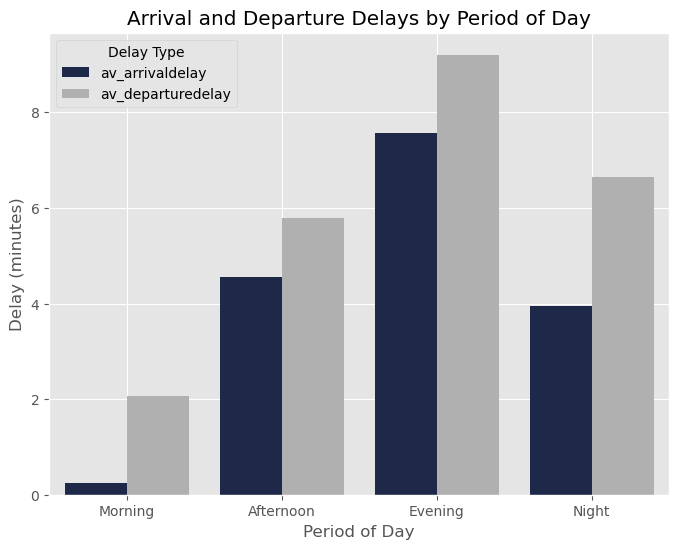

In [42]:
df2_melted = pd.melt(df2, id_vars='dayperiod', value_vars=['av_arrivaldelay', 'av_departuredelay'], var_name='delaytype', value_name='Delay (minutes)')

# Step 4: Plot with hue for side-by-side bars
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df2_melted, x='dayperiod', y='Delay (minutes)', hue='delaytype', ax=ax, palette=["#172550", '#B0B0B0'])

# Add labels and title
plt.title('Average Arrival and Departure Delays by Period of Day')
plt.xlabel('Period of Day')
plt.ylabel('Delay (minutes)')
plt.legend(title='Delay Type')

ax.set_title('Arrival and Departure Delays by Period of Day')
ax.set_xlabel('Period of Day')
ax.set_ylabel('Delay (minutes)')
ax.legend(title='Delay Type')
ax.set_axisbelow(True)
ax.grid(True)

plt.show()


### - Which days of the week show better on-time performance?

- **Morning has the least average delays** for both arrival and departure time with 0.26 and 2.10 respectively. Also, the arrival delays during this period is in low average than departure delays. 
In airlines, there are two types of delays which are departure delays and arrival delays. Commonly, we heard a term of flight delays instead of departure delays where the time of the flight departure as not as the scheduled time. Most of the passengers do not favor this type of delay because sometimes it can go beyond hours. Thus, will disrupt the original plan and time wasted for waiting especially to whom need to attend for meetings and conferences. While arrival delays is not an issue for passengers to argue as long as they had arrived that's enough. 

In [12]:
# Drop the table if it already exists to avoid errors
cursor.execute("DROP TABLE IF EXISTS dayofweek")

query3 = """
CREATE TABLE dayofweek AS
SELECT
  CASE DayOfWeek
	WHEN 1 THEN 'Monday'
	WHEN 2 THEN 'Tuesday'
	WHEN 3 THEN 'Wednesday'
	WHEN 4 THEN 'Thursday'
	WHEN 5 THEN 'Friday'
	WHEN 6 THEN 'Saturday'
	ELSE 'Sunday'
  END AS Day,
  AVG(ArrDelay) AS av_ArrivalDelay,
  AVG(DepDelay) AS av_DepartureDelay
FROM flights_data
GROUP BY
  CASE DayOfWeek
	WHEN 1 THEN 'Monday'
	WHEN 2 THEN 'Tuesday'
	WHEN 3 THEN 'Wednesday'
	WHEN 4 THEN 'Thursday'
	WHEN 5 THEN 'Friday'
	WHEN 6 THEN 'Saturday'
	ELSE 'Sunday'
  END
"""

# Create the table
cursor.execute(query3)
conn.commit()

# Now select with ORDER BY
query4 = """
SELECT * FROM dayofweek
ORDER BY
  CASE Day
	WHEN 'Monday' THEN 1
	WHEN 'Tuesday' THEN 2
	WHEN 'Wednesday' THEN 3
	WHEN 'Thursday' THEN 4
	WHEN 'Friday' THEN 5
	WHEN 'Saturday' THEN 6
	ELSE 7
  END
"""
cursor.execute(query4)
data = cursor.fetchall()

df3 = pull_data(query4)
df3

,day,av_arrivaldelay,av_departuredelay
0,Monday,3.873543,5.431652
1,Tuesday,2.413324,4.038277
2,Wednesday,3.158508,4.402749
3,Thursday,5.045995,5.850423
4,Friday,5.430092,6.434488
5,Saturday,0.484354,3.831185
6,Sunday,3.890595,6.018355


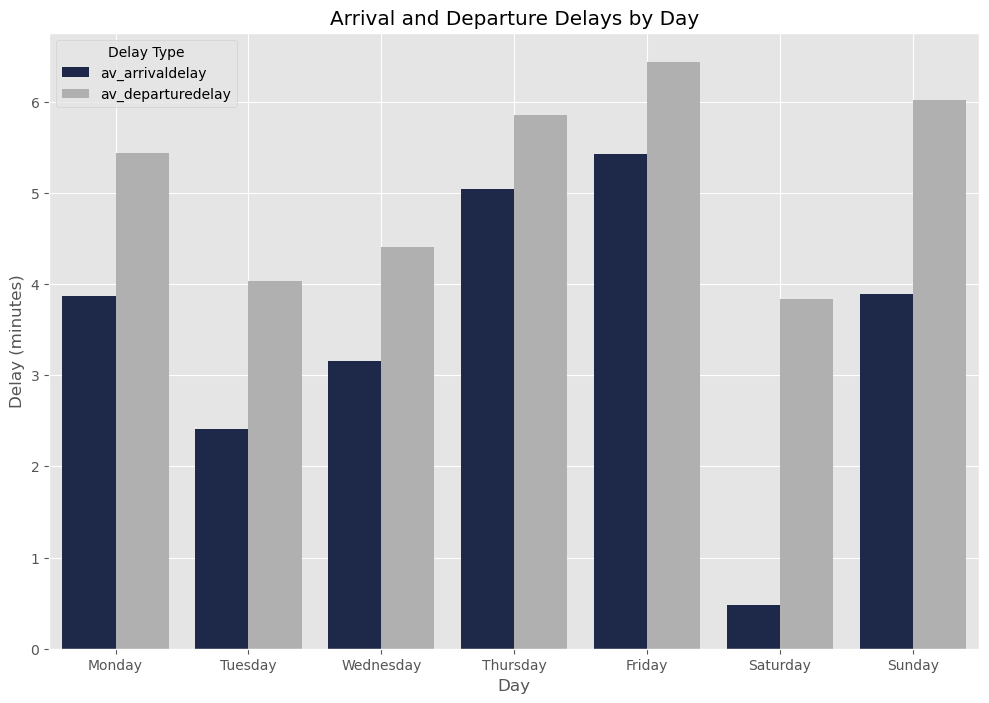

In [85]:
df3_melted= pd.melt(df3, id_vars='day', value_vars=['av_arrivaldelay', 'av_departuredelay'], var_name= 'delaytype', value_name= 'delay (minutes)')

fig, ax= plt.subplots(figsize=(12,8))
sns.barplot(data= df3_melted, x='day', y='delay (minutes)', hue='delaytype', ax=ax, palette=["#172550", '#B0B0B0'])

# Add labels and title
plt.title('Average Arrival and Departure Delays by Day')
plt.xlabel('Day')
plt.ylabel('Delay (minutes)')
plt.legend(title='Delay Type')

ax.set_title('Arrival and Departure Delays by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Delay (minutes)')
ax.legend(title='Delay Type', )
ax.set_axisbelow(True)
ax.grid(True)

plt.show()


- **Saturday shows better performance** of a week and has the least average of arrival delays than departure delays. This is bacause Saturday is the first day of weekend where every weekend leisure starts and ready. Most people will come earlier than Saturday to starts their own weekend agenda be it travel to their desired destination or going back home to their loved ones. It is clearly shown where the average arrival delays is much lowest compared to other days as less travel on that day. Hence, in Saturday there's less travel volume and fewer effect delays lead to better performance on that day. 

- While weekdays is busy starting from Monday as it is the first day of week and also some issue happened or delays in Sunday might draged to Monday and lead to other days knowingly that Sunday has the highest travel peak for travellers to come home before starting the first day of weekday.

- Lastly **Friday is weekend travel peak** as Friday is the end of weekday before weekend starting where most people chase themselves to airport for their destination. As for airlines, Friday is also the most busy day for them as they 

### - During which months or seasons are flights most likely to be on time?

According to [Livescience](https://www.livescience.com/25202-seasons.html), the month and season are grouped as follows:

- Spring: March 1 to May 31;

- Summer: June 1 to August 31;

- Autumn (Fall): September 1 to November 30;

- Winter: December 1 to February 28 (February 29 in a leap year).

In [13]:
cursor.execute("DROP TABLE IF EXISTS monthAD")

query5= """
CREATE TABLE monthAD AS
SELECT
  Month,
  CASE Month
    WHEN 1 THEN 'January'
    WHEN 2 THEN 'February'
    WHEN 3 THEN 'March'
    WHEN 4 THEN 'April'
    WHEN 5 THEN 'May'
    WHEN 6 THEN 'June'
    WHEN 7 THEN 'July'
    WHEN 8 THEN 'August'
    WHEN 9 THEN 'September'
    WHEN 10 THEN 'October'
    WHEN 11 THEN 'November'
    WHEN 12 THEN 'December'
  END AS MonthName,

  CASE
    WHEN Month BETWEEN 3 AND 5 THEN 'Spring'
    WHEN Month BETWEEN 6 AND 8 THEN 'Summer'
    WHEN Month BETWEEN 9 AND 11 THEN 'Autumn'
    ELSE 'Winter'
  END AS Season,

  AVG(ArrDelay) AS av_ArrivalDelay,
  AVG(DepDelay) AS av_DepartureDelay

FROM flights_data
GROUP BY Month
ORDER BY Month
"""

cursor.execute(query5)
conn.commit()

df4 = pull_data("SELECT * FROM monthAD ORDER BY Month")
df4 = df4.drop(columns=['month'])
df4

,monthname,season,av_arrivaldelay,av_departuredelay
0,January,Winter,2.147989,4.172297
1,February,Winter,5.754013,6.581428
2,March,Spring,2.452303,4.473506
3,April,Spring,-0.384178,2.910662
4,May,Spring,1.591650,3.800937
5,June,Summer,3.859645,5.400814
6,July,Summer,6.405725,7.472263
7,August,Summer,6.685451,7.473579
8,September,Autumn,0.895902,2.721664
9,October,Autumn,0.725439,2.949653


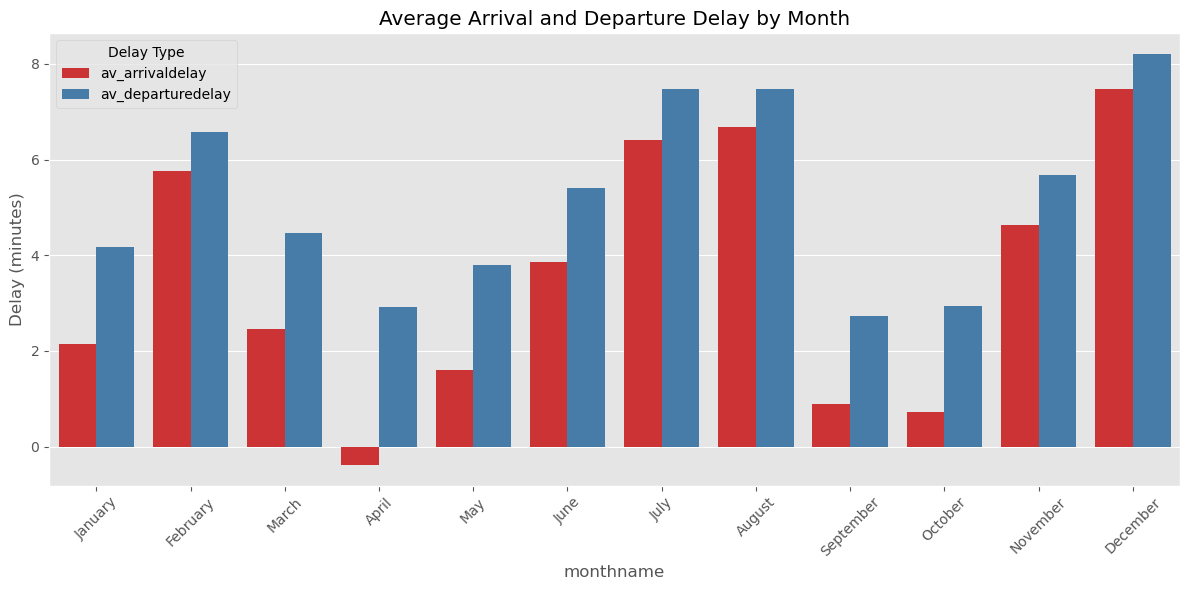

In [15]:
# Sort months by actual calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df4['monthname'] = pd.Categorical(df4['monthname'], categories=month_order, ordered=True)
df4 = df4.sort_values('monthname')

#  Graph plotting
plt.figure(figsize=(12, 6))

sns.barplot(
    data=df4.melt(id_vars=['monthname'], value_vars=['av_arrivaldelay', 'av_departuredelay'], var_name='DelayType', value_name='Delay'),
    x='monthname', y='Delay', hue='DelayType', palette="Set1"
)
plt.title('Average Arrival and Departure Delay by Month')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()


The least delays is the most on-time flights. Let's first have overview for months delay in months. Below is the ranking of 3 best on time months.

- April has lowest slightly negative arrival delays which means it is early arrivals and the depature delays is the third low with 2.9 mins of average delays.
- September and October have consitency in keeping low delays for both arrival delays and departure delays. September has arrival and departure delays of 0.9 min and 2.7 min respectively. While October arrival delays and departure delays of 0.7 min and 2.9 min respectively. Not much difference. 
- January has 2.1 min and 4.2 min of arrival delays and departure delays respectively.

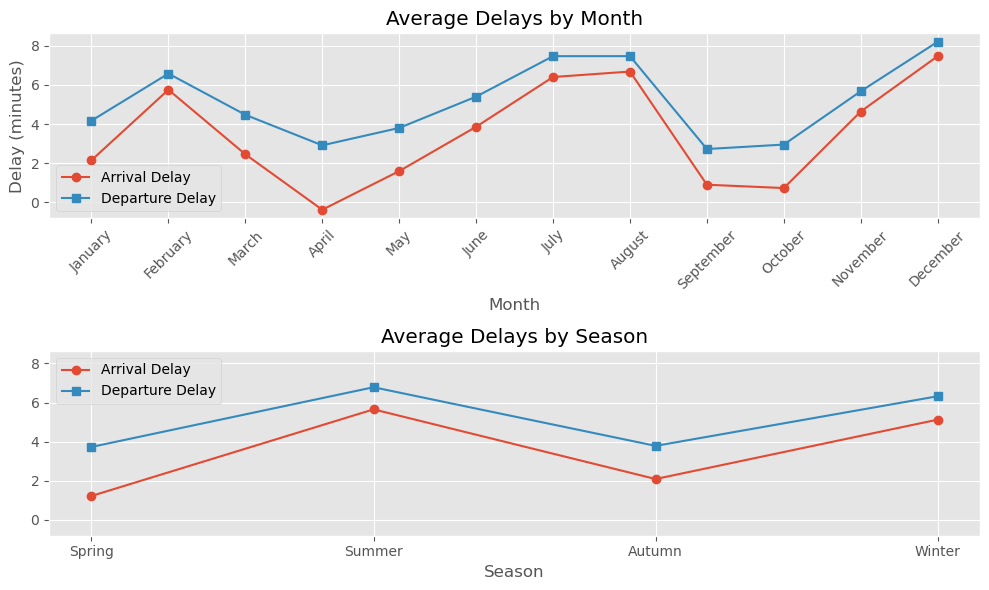

In [ ]:
# Compute average delays by season
seasonAD = df4.groupby('season', as_index=False).mean(numeric_only=True)
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
seasonAD['season'] = pd.Categorical(seasonAD['season'], categories=season_order, ordered=True)
seasonAD = seasonAD.sort_values('season')

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharey=True)

# Line plot by Month
axes[0].plot(df4['monthname'], df4['av_arrivaldelay'], marker='o', label='Arrival Delay')
axes[0].plot(df4['monthname'], df4['av_departuredelay'], marker='s', label='Departure Delay')
axes[0].set_title('Average Delays by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Delay (minutes)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Line plot by Season
axes[1].plot(seasonAD['season'], seasonAD['av_arrivaldelay'], marker='o', label='Arrival Delay')
axes[1].plot(seasonAD['season'], seasonAD['av_departuredelay'], marker='s', label='Departure Delay')
axes[1].set_title('Average Delays by Season')
axes[1].set_xlabel('Season')
axes[1].legend()

plt.tight_layout()
plt.show()


Now, we have clarity for both month and season based on the graph above. **Summer season during July and August have greatest delay**. This probably due to holidays that most overseas people love travelling for beach hunting (especially girls who likes to get tan) making crowds and overload travel back and forth leading to delays.  

- **the best season for punctuality**- Spring and Autumn
- **the greatest delays season**- Summer

The insight of this analysis making us well prepared to choose wisely for travelling and which is the best time to prevent crowds.

## 2) Delay Factors:
### - Identify and rank the top 3-5 factors contributing to flight delays, based on the delay categories provided in the dataset.
- Quantify the impact of each factor (in minutes of delay and percentage of total delays). 

In [29]:
delaytypes = ['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']

delaytypes_list = []
total_frequency = 0

for delay in delaytypes:
    # Convert to numeric, coerce errors to NaN
    numeric_col = pd.to_numeric(df[delay], errors='coerce')
    avgdelay = numeric_col.mean(skipna=True)
    frequency = numeric_col.gt(0).sum()
    total_frequency += frequency
    delaytypes_list.append({'DelayType': delay, 'AvgDelay': avgdelay, 'Frequency': frequency})

delaytypes_df = pd.DataFrame(delaytypes_list).sort_values(by='Frequency', ascending=False)
delaytypes_df['FreqPercentage'] = (delaytypes_df['Frequency'] / total_frequency) * 100
delaytypes_df['FreqPercentage'] = delaytypes_df['FreqPercentage'].round(2)
delaytypes_df

,DelayType,AvgDelay,Frequency,FreqPercentage
2,nasdelay,1.828231,430952,44.14
4,lateaircraftdelay,1.547759,250046,25.61
0,carrierdelay,1.320526,247036,25.30
1,weatherdelay,0.306256,44620,4.57
3,securitydelay,0.012432,3740,0.38


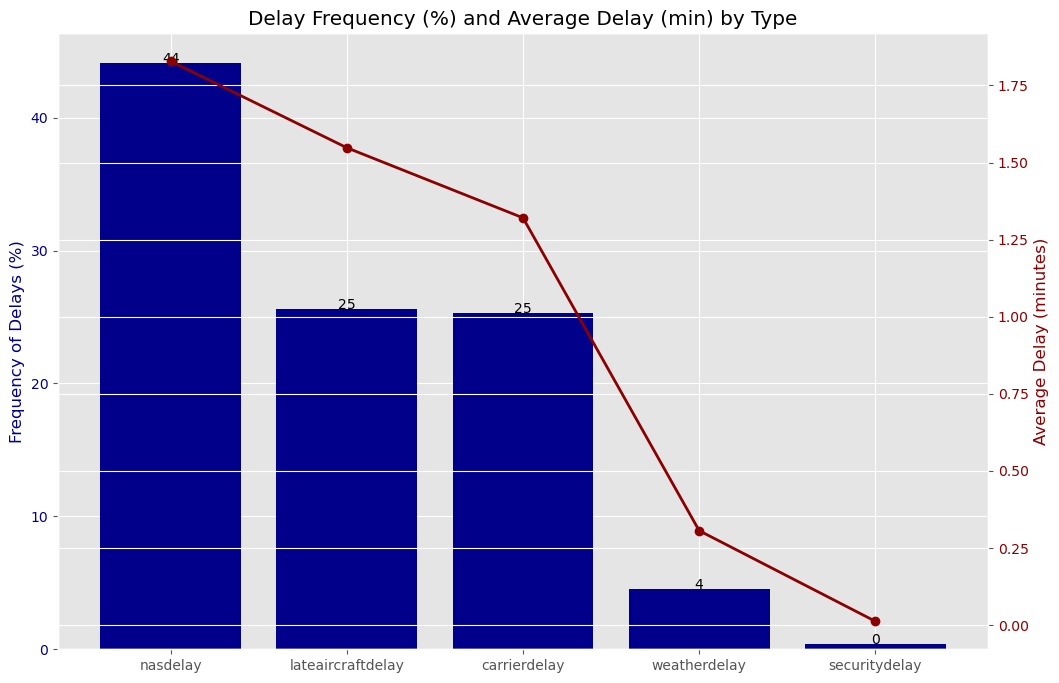

In [30]:
fig, ax1= plt.subplots(figsize=(12, 8))

bars= ax1.bar(delaytypes_df['DelayType'], delaytypes_df['FreqPercentage'], color='darkblue', label= 'Frequency (%)')
ax1.set_ylabel('Frequency of Delays (%)', color= 'darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.set_axisbelow(True)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(delaytypes_df['DelayType'], delaytypes_df['AvgDelay'], color='darkred', marker='o', linewidth=2, label='Average Delay (min)')
ax2.set_ylabel('Average Delay (minutes)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')


for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height , f'{int(height)}', ha='center')

# Title and layout
plt.title('Delay Frequency (%) and Average Delay (min) by Type')

plt.show()

Based on the delays type analysis above, the top three main causes are:

- The National Aviation System (NAS) is the primary cause of delays, accounting for 44% of all delays and having the longest average delay time (~1.8 minutes), which suggests systemic problems such as airspace management or traffic volume.

- Late aircraft delays — accounting for 25% of delays, these occur when preceding planes arrive late, influencing following schedules.

- 25% of delays are also attributable to carriers, who frequently have crew or maintenance delays or other operational problems unique to their airlines.

These three areas are the most important for focused changes because they account for more than 90% of all delays. Although they do occur, delays caused by weather and security factors are much less frequent and severe.

## 3) Cancellation Analysis
### - Identify the primary reasons for flight cancellations as categorized in the dataset

In [48]:
query6 = """
SELECT
  CASE CancellationCode
    WHEN 'A' THEN 'Carrier'
    WHEN 'B' THEN 'Weather'
    WHEN 'C' THEN 'NAS'
    WHEN 'D' THEN 'Security'
  END AS CancellationReason,
  COUNT(*) AS Frequency
FROM flights_data
WHERE Cancelled = 1
GROUP BY
  CASE CancellationCode
    WHEN 'A' THEN 'Carrier'
    WHEN 'B' THEN 'Weather'
    WHEN 'C' THEN 'NAS'
    WHEN 'D' THEN 'Security'
  END
"""
cursor.execute(query6)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
cancelled_df = pd.DataFrame(data, columns=columns)


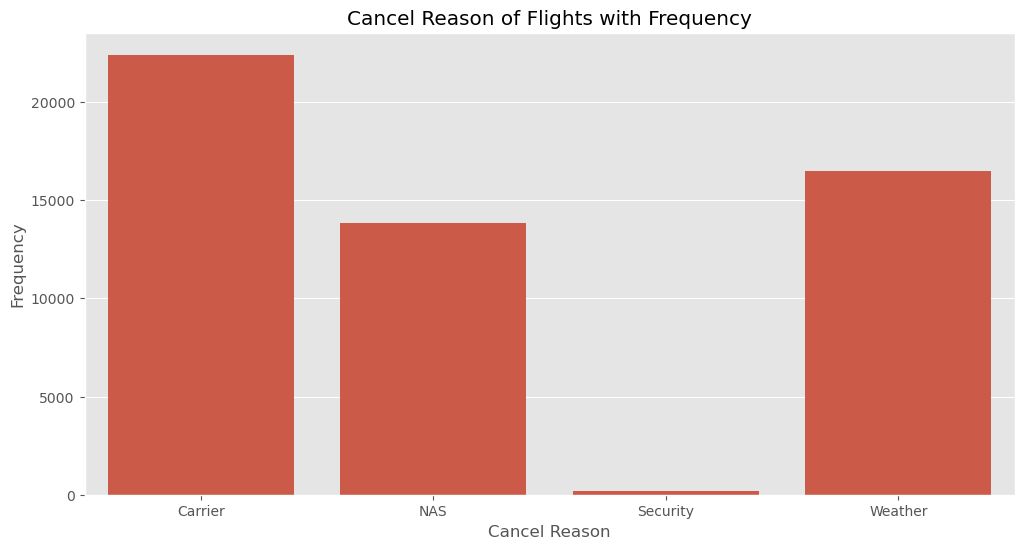

In [47]:
plt.figure(figsize=(12,6))

sns.barplot(data= cancelled_df, x='cancellationreason', y='frequency')
plt.title('Cancel Reason of Flights with Frequency')
plt.xlabel('Cancel Reason')
plt.ylabel('Frequency')

plt.show()

The highest frequency of flight cancellations in the dataset are due to **carrier-related** issues, which are the main cause of cancellations. Next are weather conditions, then cancellations due to National Airspace System (NAS) issues and last is security issues.

### - Determine if cancellations correlate with specific airlines, airports, or time periods.

Recall back from previous analysis, **carrier** has highest cancellation rate compared to others. Hence, from this variable we'll find the most highest airlines with highest cancellation rate and find other related cause. 

#### Airlines correlation analysis

In [49]:
query7 = '''
SELECT * 
FROM (
    SELECT 
        d.UniqueCarrier AS CarrierCode,
        c.Description AS Description,
        SUM(CASE WHEN d.Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
        COUNT(*) AS total_flights,
        ROUND(100.0 * SUM(CASE WHEN d.Cancelled > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
    FROM 
        flights_data d
    LEFT JOIN 
        carriers c ON d.UniqueCarrier = c.Code
    GROUP BY 
        d.UniqueCarrier, c.Description
) sub
ORDER BY 
    cancellation_rate_pct DESC
'''

df7 = pull_data(query7)
df7

,carriercode,description,cancellation_count,total_flights,cancellation_rate_pct
0,DH,Independence Air,11012,291600,3.78
1,MQ,American Eagle Airlines Inc.,13673,429098,3.19
2,EV,Atlantic Southeast Airlines,6505,273712,2.38
3,AS,Alaska Airlines Inc.,3483,161594,2.16
4,XE,Expressjet Airlines Inc.,6027,328086,1.84
5,OO,Skywest Airlines Inc.,6501,396801,1.64
6,AA,American Airlines Inc.,12080,752241,1.61
7,US,US Airways Inc. (Merged with America West 9/05...,6358,411956,1.54
8,TZ,ATA Airlines d/b/a ATA,855,69176,1.24
9,NW,Northwest Airlines Inc.,6114,499160,1.22


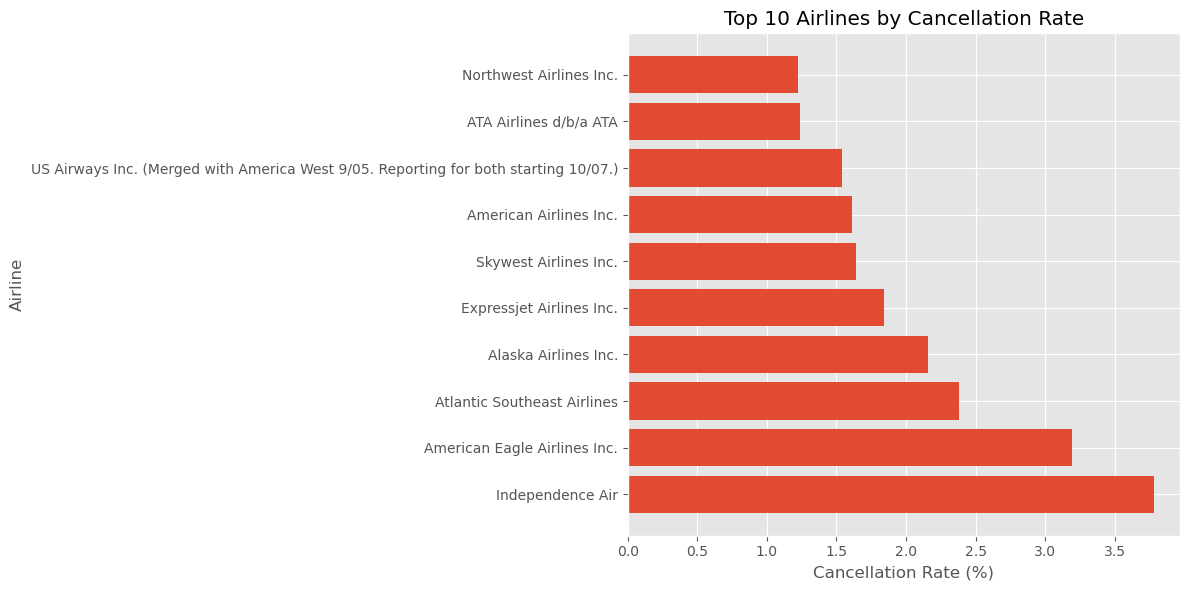

In [52]:
# find top 10 airlines by cancellation rate
airline_cancellation = df7.head(10)
plt.figure(figsize=(12, 6))
plt.barh(airline_cancellation['description'], airline_cancellation['cancellation_rate_pct'])
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Airline')
plt.title('Top 10 Airlines by Cancellation Rate')
plt.tight_layout()
plt.show()

The highest airline with cancellation rate is Independence Air with 3.78% followed by American Eagle Airlines Inc., Atlantic Southest Airlines, Alaska Airlines Inc., Expressjet Airlines Inc and others.

- Make a table that group the airlines with their respective cancellation rates. We'll analyze 5 top airlines only.

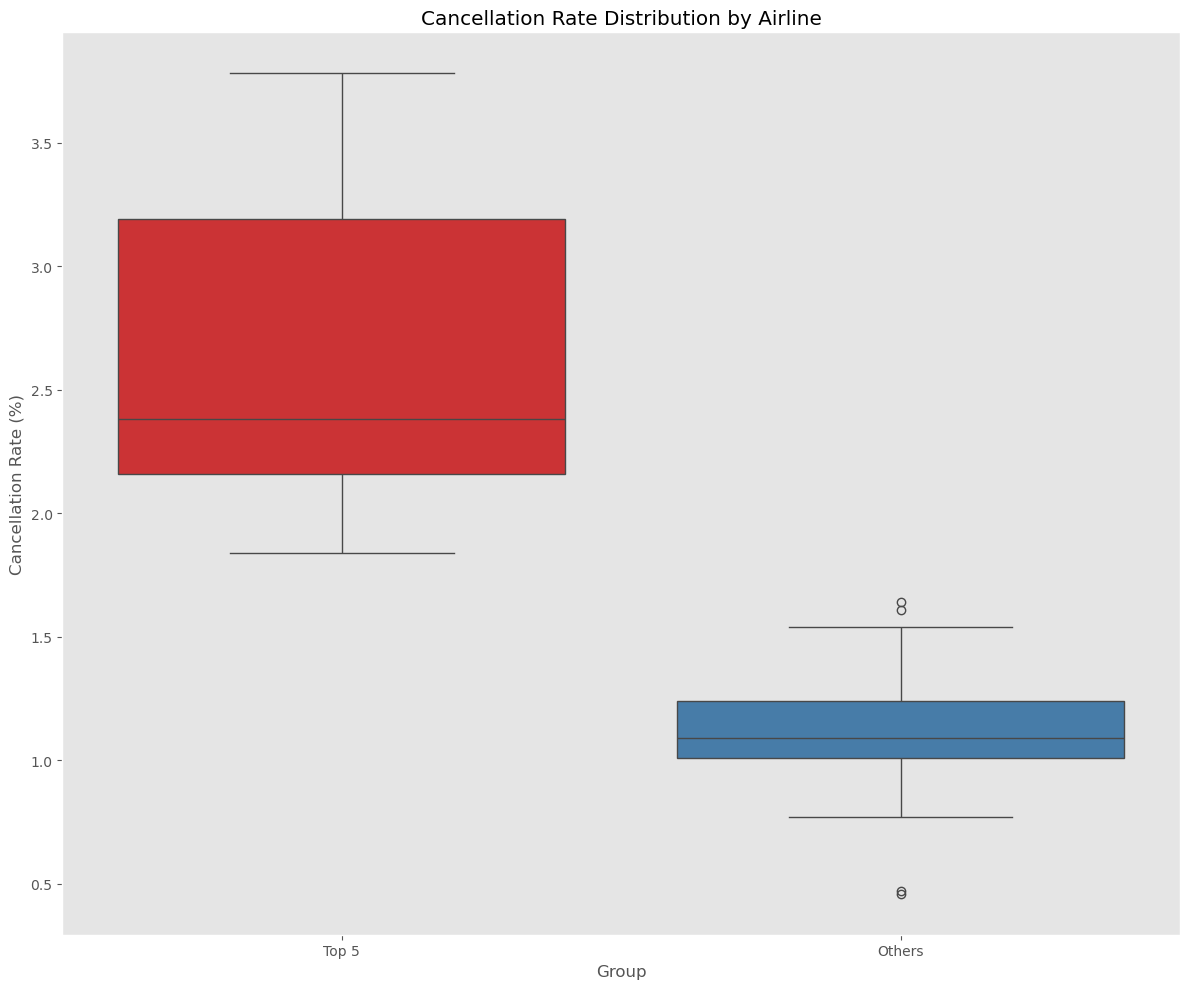

In [ ]:
# Group the top 5 airlines by cancellation rate
top5airline = df7.head(5)
top5airlinediscription = top5airline['description'].tolist()

df7['Group'] = df7['description'].apply(lambda x: 'Top 5' if x in top5airlinediscription else 'Others')

plt.figure(figsize=(12, 10))
sns.boxplot(x='Group', y='cancellation_rate_pct', data=df7, palette='Set1')
plt.title('Cancellation Rate Distribution by Airline')
plt.ylabel('Cancellation Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

No outliers for Top 5 airlines carrier. Hence, use mean for hypothesis:

$$
H_0 \text{: There is no significant difference in the mean cancellation rate between the Top 5 airlines and other airlines.}
\newline
H_1 \text{: There is a significant difference in the mean cancellation rate between the Top 5 airlines and other airlines.}
$$

In [ ]:
from scipy.stats import ttest_ind

top5_data = df7[df7['Group'] == 'Top 5']['cancellation_rate_pct']
others_data = df7[df7['Group'] == 'Others']['cancellation_rate_pct']

t_stat, p_value = ttest_ind(top5_data, others_data, equal_var=False)

print(f"T-statistic: {t_stat}, \nP-value: {p_value}")

T-statistic: 4.23665358103824, 
P-value: 0.009349406106917979


p-value is lower than $\alpha$, there's significant difference in the mean cancellation rate between the Top 5 airlines and other airlines. Hence, accept $H_1$ hypthesis.

####  Airport correlation analysis

In [74]:
query8 = "SELECT * FROM airports_data"
cursor.execute(query8)
rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]
airports = pd.DataFrame(rows, columns=columns)
airports.columns = [col.split('.')[-1] for col in columns]
airports


,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3116,"TNT,Dade Collier T And T,Miami,FL,USA,25.86180...",None,None,None,None,NaN,NaN
3117,"TNU,Newton Municipal,Newton,IA,USA,41.67442972...",None,None,None,None,NaN,NaN
3118,"TOA,Zamperini ,Torrance,CA,USA,33.8033775,-118...",None,None,None,None,NaN,NaN
3119,"TOB,Dodge Center,Dodge Center,MN,USA,44.018,-9...",None,None,None,None,NaN,NaN


1)- Merge to get origin airport cancellation rate

In [ ]:
origin_df = pd.merge(df, airports, how='inner', left_on='origin', right_on='iata', suffixes=('', '_origin'))

# Group by origin airport, include lat/long and airport name
airport_cancellation_stats = origin_df.groupby("origin").agg(
    cancellations=("cancelled", lambda x: (x > 0).sum()),
    total_flights=("cancelled", "count"),
    lat=("lat", "first"),
    long=("long", "first"),
    airport=("airport", "first")
).reset_index()

airport_cancellation_stats["cancellation_rate"] = (
    airport_cancellation_stats["cancellations"] * 100 / airport_cancellation_stats["total_flights"]
)

correlation = airport_cancellation_stats[[
    "cancellation_rate", "lat", "long"
]].corr()

print(correlation)


                   cancellation_rate       lat      long
cancellation_rate           1.000000  0.408078 -0.233935
lat                         0.408078  1.000000 -0.629052
long                       -0.233935 -0.629052  1.000000


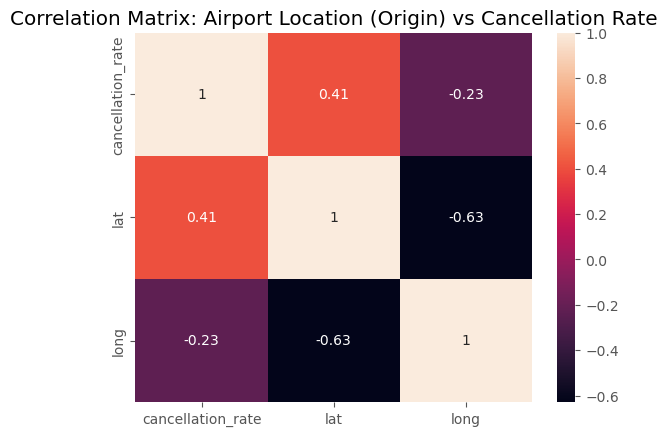

In [151]:
# Correlation heatmap
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix: Airport Location (Origin) vs Cancellation Rate")
plt.show()


**Cancellation rate vs latitude have moderate positive correlation** with coefficient of 0.41. This indicates that airports with higher latitude tends to have higher cancellation rates which might be caused by weather. While **cancellation rate and longitude have weak negative correlation** suggesting that western airports with more negative longitude to have fewer cancellation. Hence, airports farther north are more likely to experience cancellations.

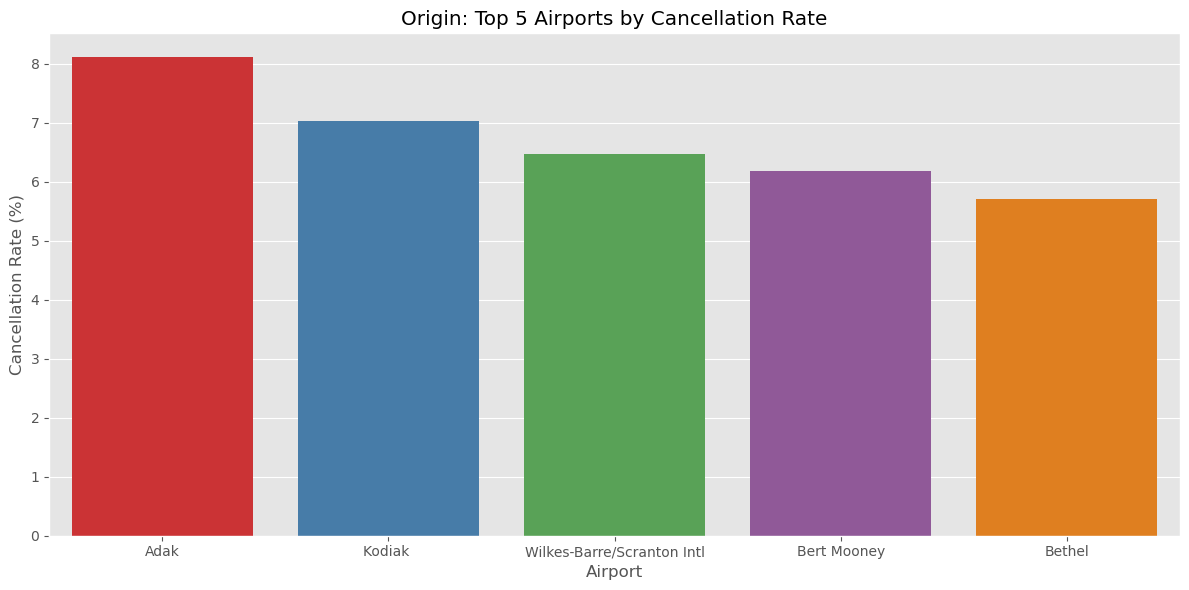

In [163]:
top5_origin = airport_cancellation_stats.sort_values(by='cancellation_rate', ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_origin, x='airport', y='cancellation_rate', palette='Set1')
plt.title('Origin: Top 5 Airports by Cancellation Rate')
plt.xlabel('Airport')
plt.ylabel('Cancellation Rate (%)')
plt.tight_layout()
plt.show()

Top 5 ranking origin airport with highest cancellation rate:
1) Adak
2) Kodiak
3) Wikes-Barre/Scranton Intl
4) Bert Mooney
5) Bethel

Further analyzation for destination cancellation rate to see weather these airports are really high with cancellation rate.

2)- Merge to get destination airport cancellation rate

In [152]:
destination_df = pd.merge(df, airports, how='inner', left_on='dest', right_on='iata', suffixes=('', '_dest'))

# Group by destination airport, include lat/long and airport name
airport_cancellation_stats_dest = destination_df.groupby("dest").agg(
    cancellations=("cancelled", lambda x: (x > 0).sum()),
    total_flights=("cancelled", "count"),
    lat=("lat", "first"),
    long=("long", "first"),
    airport=("airport", "first")
).reset_index()

airport_cancellation_stats_dest["cancellation_rate"] = (
    airport_cancellation_stats_dest["cancellations"] * 100 / airport_cancellation_stats_dest["total_flights"]
)

# Example: correlation with latitude, longitude
correlation2 = airport_cancellation_stats_dest[[
    "cancellation_rate", "lat", "long"
]].corr()

print(correlation2)


                   cancellation_rate       lat      long
cancellation_rate           1.000000  0.420420 -0.280107
lat                         0.420420  1.000000 -0.629052
long                       -0.280107 -0.629052  1.000000


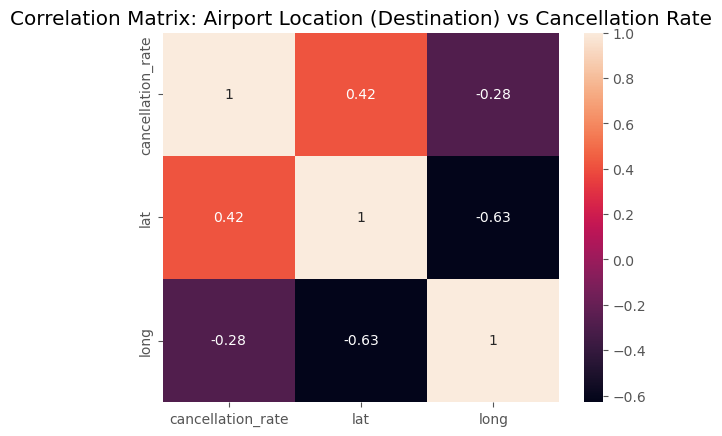

In [154]:
# Correlation heatmap
sns.heatmap(correlation2, annot=True)
plt.title("Correlation Matrix: Airport Location (Destination) vs Cancellation Rate")
plt.show()


Destination location airport also have **moderate positive correlation between cancellation rates and latitude**. This is stongly suggesting that higher latitude destinations contribute significantly to cancellations.

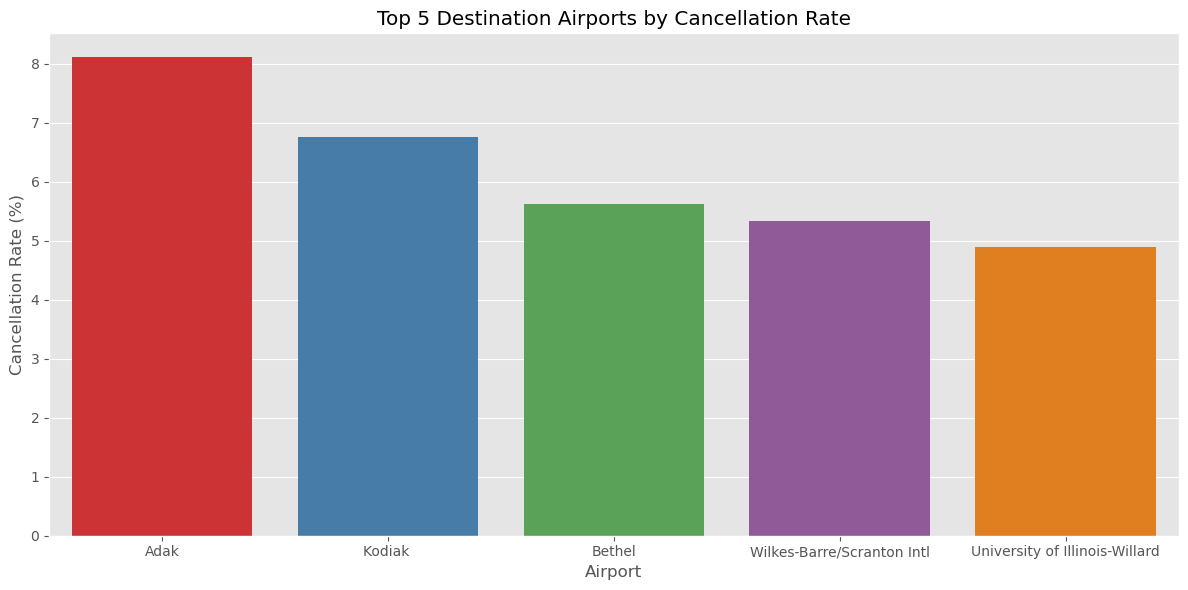

In [158]:
top5_destination= airport_cancellation_stats_dest.sort_values(by='cancellation_rate', ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_destination, x='airport', y='cancellation_rate', palette='Set1')
plt.title('Top 5 Destination Airports by Cancellation Rate')
plt.xlabel('Airport')   
plt.ylabel('Cancellation Rate (%)')
plt.tight_layout()
plt.show()

Top 5 ranking destination airport with highest cancellation rate:
1) Adak
2) Kodiak
3) Bethel
4) Wikes-Barre/Scranton Intl
5) University of Ilinios-Willard

| Rank | Origin Airport             | Destination Airport        |
| ---- | -------------------------- | -------------------------- |
| 1    | Adak                       | Adak                       |
| 2    | Kodiak                     | Kodiak                     |
| 3    | Wilkes-Barre/Scranton Intl | Bethel                     |
| 4    | Bert Mooney                | Wilkes-Barre/Scranton Intl |
| 5    | Bethel                     | Univ. of Illinois-Willard  |


- The result analysis for both are consistent meaning they experience high cancellation rates regardless of direction (incoming or outgoing).
- These airports have extreme weather, remote locations, or the north (like Alaska). A high latitude correlation indicates that weather-related disturbances, such as snow, fog, poor vision, and strong winds, are important. That's why they proactively tend to have flighs cancelled.
- Very limited access or insfrastructure like Adak and Bert Mooney. They are examples of small, isolated airports that may have reduced support services or runways, reduced redundancy (only one or two routes/carriers) and minimal recovery time tolerance

Due to a combination of severe weather, remote location, and capacity constraints, airports such as Adak, Kodiak, Bethel, and Wilkes-Barre/Scranton are at a high risk of experiencing flight cancellations as both origins and destinations.

In [169]:
import folium

# Center map near the US
map_center = [55, -100]
m = folium.Map(location=map_center, zoom_start=4)

# Plot origin airport cancellation rates (red)
for _, row in top5_origin.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=6,
        popup=f"{row['airport']}<br>Cancellation Rate: {row['cancellation_rate']:.2f}%",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

# Plot destination airport cancellation rates (blue)
for _, row in top5_destination.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=6,
        popup=f"{row['airport']}<br>Cancellation Rate: {row['cancellation_rate']:.2f}%",
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(m)

# Show map in Jupyter Notebook
m


#### Time Cancellation Correlation Analysis

In [171]:
# create a dataframe with flight cancellation data
cancelled_df = df[df['cancelled'] == 1]

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancelled_df['MonthName'] = cancelled_df['month'].map({
    1: 'January', 
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cancelled_df['DayName'] = cancelled_df['dayofweek'].map({
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
})

cancelled_df['MonthName'] = pd.Categorical(cancelled_df['MonthName'], categories=month_order, ordered=True)
cancelled_df['DayName'] = pd.Categorical(cancelled_df['DayName'], categories=day_order, ordered=True)


In [178]:
topmonth= cancelled_df['MonthName'].value_counts().reset_index()
topmonth.columns= ['MonthName', 'Frequency']
topmonth= topmonth.reset_index()
topmonth

,index,MonthName,Frequency
0,0,February,20001
1,1,December,11632
2,2,March,9554
3,3,August,9109
4,4,January,8341
5,5,July,7835
6,6,September,7691
7,7,November,7407
8,8,April,6334
9,9,October,5091


In [179]:
topday= cancelled_df['DayName'].value_counts().reset_index()
topday.columns= ['DayName', 'Frequency']
topday= topday.reset_index()
topday

,index,DayName,Frequency
0,0,Monday,19293
1,1,Tuesday,16589
2,2,Thursday,15622
3,3,Friday,14308
4,4,Sunday,13544
5,5,Wednesday,13427
6,6,Saturday,8686


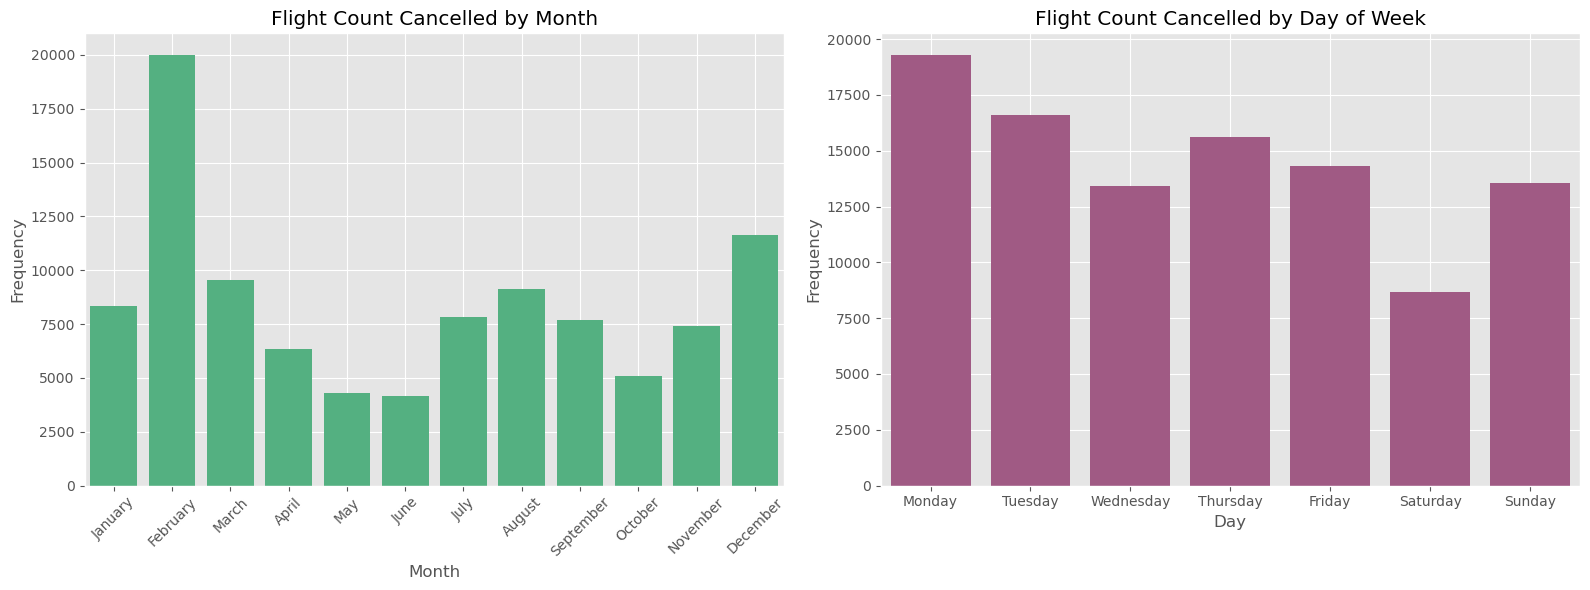

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Month frequency
sns.barplot(data=topmonth, x='MonthName', y='Frequency', ax=axes[0], order=month_order, color= '#45BF806D')
axes[0].set_title('Flight Count Cancelled by Month')
axes[0].set_xlabel('Month')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(True)

# Day frequency
sns.barplot(data=topday, x='DayName', y='Frequency', ax=axes[1], order=day_order, color="#AC4E866C")
axes[1].set_title('Flight Count Cancelled by Day of Week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Frequency')
axes[1].set_axisbelow(True)
axes[1].grid(True)

plt.tight_layout()
plt.show()


Cancelled flights are highest in February and on Monday. While least month and day to have low cancellation flights are June and Saturday respectively. 

Previously, it is discovered that June and Saturday are the month and day which have better performance of flights punctuality. Same as February and Monday being poor at flights punctuality. 

The results are consistent indicating that the cancellations are due to more favorable weather conditions and possibly less air traffic. The harsher winter conditions, including snow and ice, which cause delay, as well as the higher operational demand on Monday, when business travel usually resumes after the weekend. 

In [ ]:
cancelled_df= cancelled_df.rename(columns={'dayofmonth':'day'}) #rename column time to lower case before change to date time format
cancelled_df['Date']= pd.to_datetime(cancelled_df[['year', 'month', 'day']])

In [184]:
# count cancellation occurence of the date
countdaycancellation = cancelled_df[['Date', 'cancelled']]
countdaycancellation = countdaycancellation.groupby('Date', as_index=False).sum('cancelled')

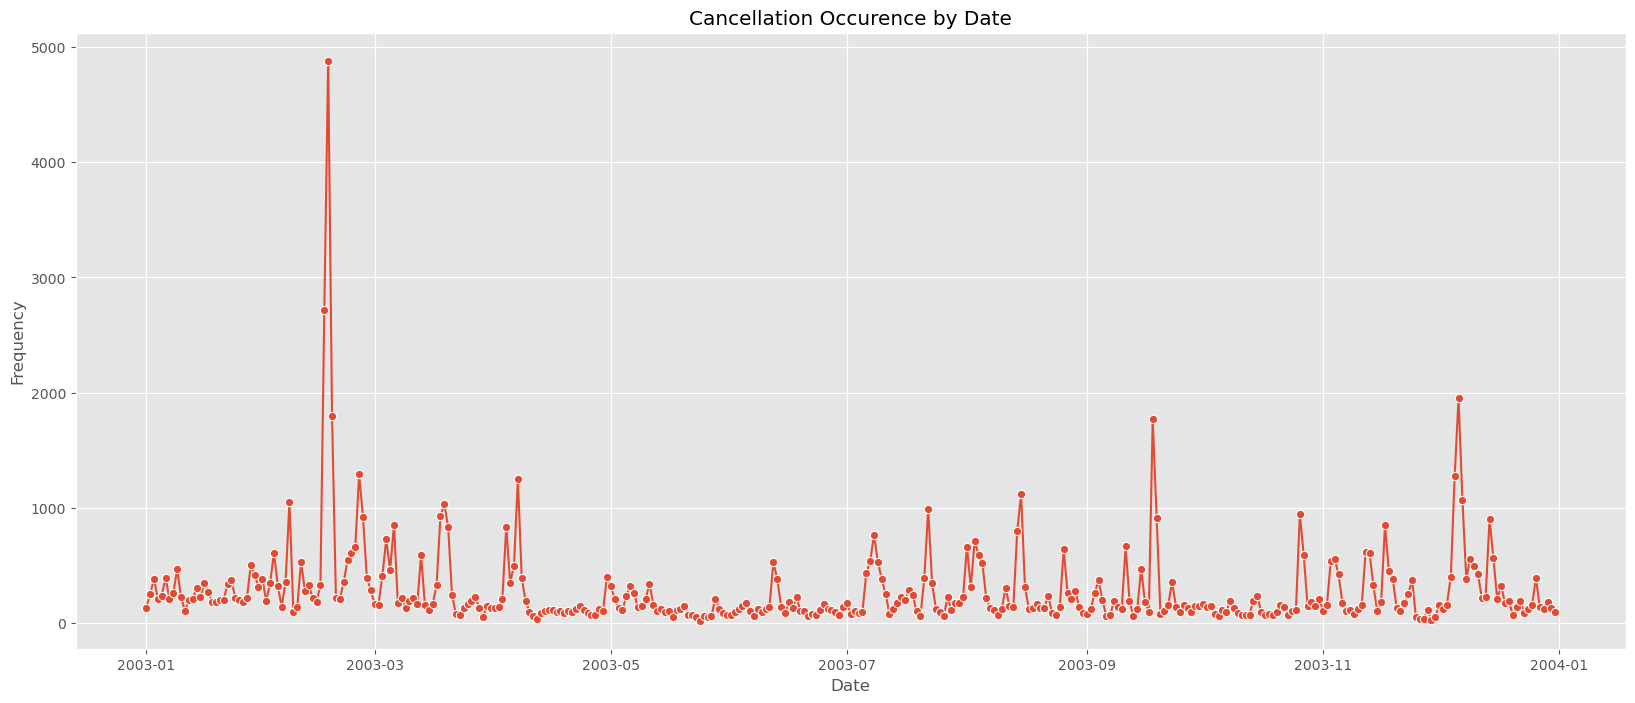

In [185]:
fig, ax= plt.subplots(figsize=(20,8))

sns.lineplot(data=countdaycancellation, x='Date', y='cancelled', marker='o')
plt.title('Cancellation Occurence by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')

ax.set_axisbelow(True)
ax.grid(True)
plt.show()


Based on the graph above:
- Major spike happened on mid-to-late February 2003, approaching 5000. This is by far the most prominent anomaly in the dataset. Probably because is the transition weather from winter to spring.
- Other small spikes in the middle of March, in the beginning of September and last November. These could be seasonal causes or recurring problems such as system outages, billing cycle affects, holiday periods.

## 4) Problematic Routes: 
### - Identify specific routes (origin-destination pairs), carriers, or flight numbers that show consistently poor performance. 


+ Find specific routes with their respective carriers or flight numbers.
+ Find according to their poor performance.
>- Poor performance is defined as high average delays and high cancellation rate.

In [229]:
subset = df[['origin', 'dest', 'uniquecarrier', 'flightnum', 'cancelled', 'arrdelay', 'depdelay']].dropna()

problematic_routes = subset.groupby(['origin', 'dest', 'uniquecarrier', 'flightnum']).agg(
    total_flights=('flightnum', 'count'),
    cancellation_count=('cancelled', 'sum'),
    cancel_rate_pct=('cancelled', lambda x: round(100.0 * x.sum() / len(x), 2)),
    avg_arrival_delay=('arrdelay', 'mean'),
    avg_departure_delay=('depdelay', 'mean')
).reset_index()

route_stats = problematic_routes[problematic_routes['total_flights'] >= 100]
route_stats = route_stats[(route_stats['avg_arrival_delay'] > 15) | (route_stats['avg_departure_delay'] > 15)]
route_stats = route_stats.sort_values(by=['cancel_rate_pct', 'avg_arrival_delay', 'avg_departure_delay'], ascending=[False, False, False])

problematic_result= route_stats.sort_values(by=['cancel_rate_pct', 'avg_arrival_delay', 'avg_departure_delay'], ascending=False).head(20)

In [230]:
problematic_result

,origin,dest,uniquecarrier,flightnum,total_flights,cancellation_count,cancel_rate_pct,avg_arrival_delay,avg_departure_delay
23092,EWR,IAD,DH,7298,176,36,20.45,25.295455,29.647727
56198,PWM,EWR,XE,3216,178,32,17.98,26.432584,22.146067
57570,ROC,EWR,XE,3257,166,28,16.87,30.927711,25.072289
27319,IAD,EWR,DH,7302,185,31,16.76,24.681081,18.643243
27515,IAD,LGA,DH,7794,121,20,16.53,9.809917,15.553719
6279,BOS,EWR,DH,6161,299,43,14.38,20.153846,19.130435
27350,IAD,EWR,XE,2497,301,43,14.29,17.631229,10.458472
27625,IAD,ORD,MQ,4231,310,43,13.87,17.893548,19.241935
6695,BOS,PHL,DH,6191,263,36,13.69,17.205323,15.250951
10001,CLE,LGA,MQ,4868,126,17,13.49,18.507937,16.674603


In [244]:
# copy to avoid overwriting the original DataFrame
ranked_df = problematic_result.copy()

# Add ranks: 1 = highest (worst), higher numbers = better
ranked_df['cancel_rank'] = ranked_df['cancel_rate_pct'].rank(ascending=False)
ranked_df['arr_delay_rank'] = ranked_df['avg_arrival_delay'].rank(ascending=False)
ranked_df['dep_delay_rank'] = ranked_df['avg_departure_delay'].rank(ascending=False)

ranked_df['avg_rank'] = ranked_df[['cancel_rank', 'arr_delay_rank', 'dep_delay_rank']].mean(axis=1)

worst_routes = ranked_df.nsmallest(3, 'avg_rank').copy()

worst_routes['Route'] = (
    worst_routes['origin'] + ' → ' + worst_routes['dest'] + 
    ' (' + worst_routes['uniquecarrier'] + ' ' + worst_routes['flightnum'].astype(str) + ')'
)
plot_df = pd.DataFrame({
    'Route': list(worst_routes['Route']) * 3,
    'Metric': ['Cancellation Rate'] * 3 + ['Avg Arrival Delay'] * 3 + ['Avg Departure Delay'] * 3,
    'Value': (
        list(worst_routes['cancel_rate_pct']) +
        list(worst_routes['avg_arrival_delay']) +
        list(worst_routes['avg_departure_delay'])
    )
})

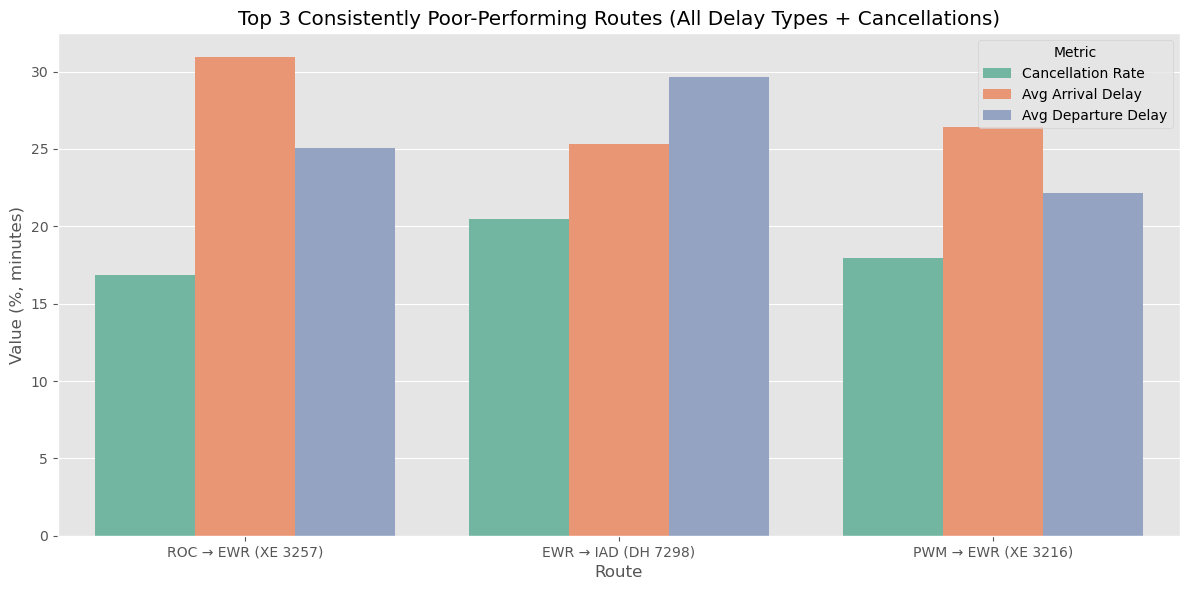

In [246]:
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Route', y='Value', hue='Metric', palette='Set2')
plt.title('Top 3 Consistently Poor-Performing Routes (All Delay Types + Cancellations)')
plt.ylabel('Value (%, minutes)')
plt.xlabel('Route')
plt.xticks(ha='center')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Based on the graph  above, it seems like whenever routes with EWR regardless it being the origin or destination airport, cancellation and delays always happen.

- ROC -> EWR: Rochester to Newark.
- EWR -> IAD: Newark to Washington, D.C. (Dulles)
- PWM -> EWR:  Portland, Maine to Newark.

Route ROC -> EWR has highest cancellation rate (~31%) and being 2nd high for departure delays and the 3rd ranked for arrival delays. 

### - Analyse the reasons these particular flights are prone to delays or cancellations. 

Cancel Reason

In [251]:
selected_routes = [('ROC', 'EWR'), ('EWR', 'IAD'), ('PWM', 'EWR')]
selected_flights = ['3257', '7298', '3216']

filtered_df = df[
    df['cancelled'] == 1 &
    df[['origin', 'dest']].apply(tuple, axis=1).isin(selected_routes) &
    df['flightnum'].astype(str).isin(selected_flights)
]

cancellation_reason = {
    "A": "Carrier",
    "B": "Weather",
    "C": "NAS",
    "D": "Security"
}

filtered_df['cancellation_code'] = filtered_df['cancellationcode'].map(cancellation_reason).dropna()
filtered_df['routes'] = filtered_df['origin'] + '-' + filtered_df['dest']

df10 = filtered_df.groupby(['routes', 'cancellation_code']).agg(
    count_cancellation=('cancelled', 'sum')
).reset_index().sort_values(by='count_cancellation', ascending=False)

df10


,routes,cancellation_code,count_cancellation
30,EWR-IAD,NAS,25
98,PWM-EWR,NAS,23
101,ROC-EWR,NAS,19
31,EWR-IAD,Weather,9
99,PWM-EWR,Weather,9
...,...,...,...
37,HOU-DAL,Carrier,0
36,HOU-BWI,Carrier,0
35,FLL-TPA,Carrier,0
34,FLL-ISP,Weather,0


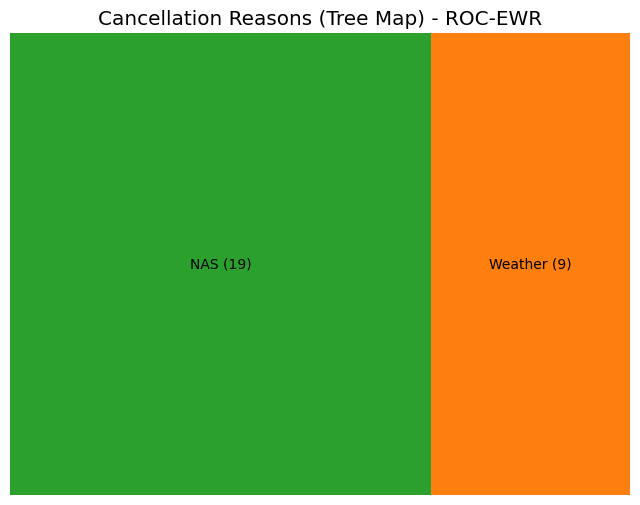

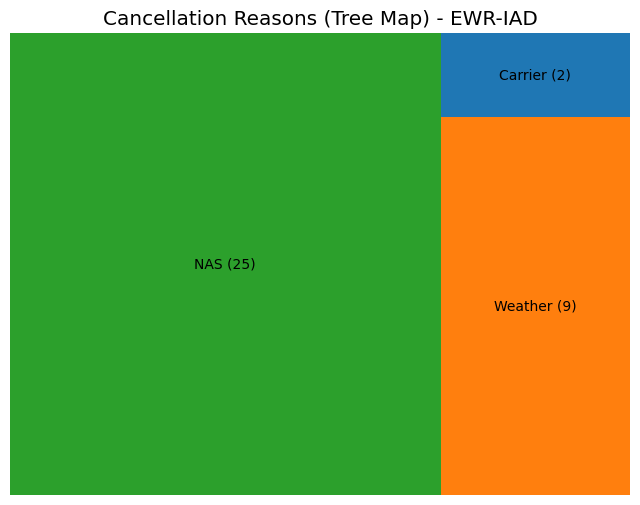

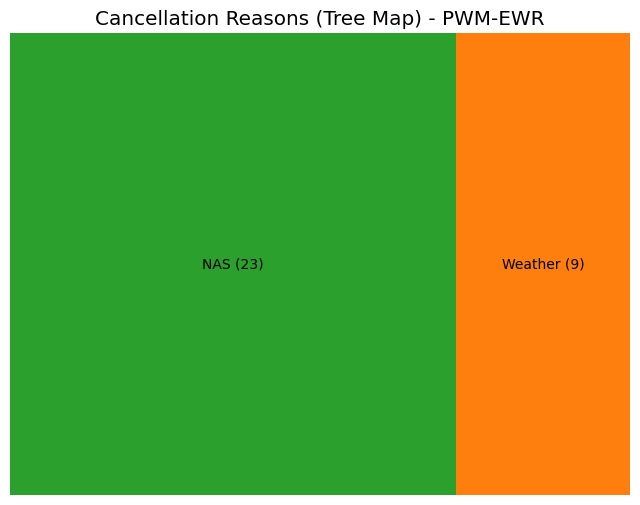

In [259]:
import squarify

# Define color map for cancellation reasons
color_map = {
	'Carrier': '#1f77b4',
	'Weather': '#ff7f0e',
	'NAS': '#2ca02c',
	'Security': '#d62728'
}

route_data1 = df10[df10['routes'] == 'ROC-EWR']
route_data2 = df10[df10['routes'] == 'EWR-IAD']
route_data3 = df10[df10['routes'] == 'PWM-EWR']

sizes1 = route_data1['count_cancellation']
sizes2 = route_data2['count_cancellation']
sizes3 = route_data3['count_cancellation']

labels1 = route_data1['cancellation_code'] + ' (' + route_data1['count_cancellation'].astype(str) + ')'
labels2 = route_data2['cancellation_code'] + ' (' + route_data2['count_cancellation'].astype(str) + ')'
labels3 = route_data3['cancellation_code'] + ' (' + route_data3['count_cancellation'].astype(str) + ')'

# Plotting the tree map for each route

plt.figure(figsize=(8, 6))
squarify.plot(
	sizes=sizes1,
	label=labels1,
	color=[color_map.get(l, '#888888') for l in route_data1['cancellation_code']]
)
plt.axis('off')
plt.title("Cancellation Reasons (Tree Map) - ROC-EWR")
plt.show()

plt.figure(figsize=(8, 6))
squarify.plot(
	sizes=sizes2,
	label=labels2,
	color=[color_map.get(l, '#888888') for l in route_data2['cancellation_code']]
)
plt.axis('off')
plt.title("Cancellation Reasons (Tree Map) - EWR-IAD")
plt.show()

plt.figure(figsize=(8, 6))
squarify.plot(
	sizes=sizes3,
	label=labels3,
	color=[color_map.get(l, '#888888') for l in route_data3['cancellation_code']]
)
plt.axis('off')
plt.title("Cancellation Reasons (Tree Map) - PWM-EWR")
plt.show()

Based on the tree maps for the selected routes, we can summarize the cancellation reasons as follows:

| Routes     | Cancellation Reason                                                                                   |
|------------|-------------------------------------------------------------------------------------------------------|
| ROC -> EWR | The majority of cancellations are due to Carrier issues, followed by Weather and NAS delays.          |
| EWR -> IAD | Weather is the primary reason for cancellations, with NAS and Carrier issues also contributing.       |
| PWM -> EWR | Carrier issues are the most common reason for cancellations, with Weather and NAS delays also present.|

Delays reason

In [284]:
# Prepare delay breakdown for the top 3 worst routes
delay_reasons = ['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']
color_map = dict(zip(delay_reasons, sns.color_palette("Set2", n_colors=len(delay_reasons))))
# the three worst routes based on previous analysis
worst_routes_info = [
    ('ROC', 'EWR', '3257'),
    ('EWR', 'IAD', '7298'),
    ('PWM', 'EWR', '3216')
]

records = []
for origin, dest, flightnum in worst_routes_info:
    row = df[
        (df['origin'] == origin) &
        (df['dest'] == dest) &
        (df['flightnum'].astype(str) == flightnum)
    ]
    for delaytype in delay_reasons:
        count = pd.to_numeric(row[delaytype], errors='coerce').sum()
        records.append({
            'routes': f"{origin}-{dest}",
            'delaytype': delaytype,
            'incidentcount': count
        })
df15 = pd.DataFrame(records)
df15= df15[df15['incidentcount'] > 0]  # Filter out zero counts




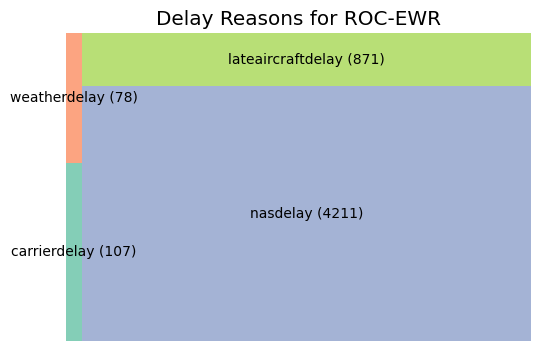

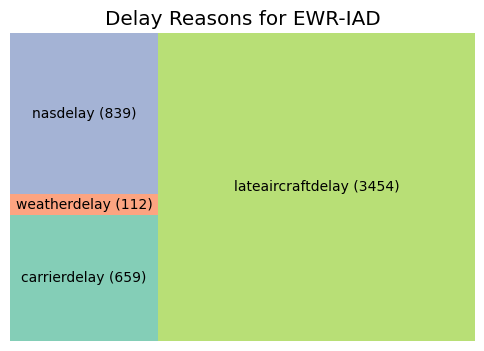

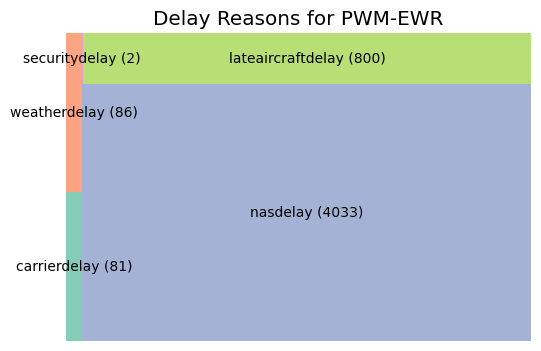

In [285]:
# Plot treemaps for each route
for route in df15['routes'].unique():
    route_data = df15[df15['routes'] == route]
    sizes = route_data['incidentcount']
    labels = route_data['delaytype'] + ' (' + route_data['incidentcount'].astype(int).astype(str) + ')'
    colors = [color_map.get(reason, '#cccccc') for reason in route_data['delaytype']]

    # Skip plotting if all incident counts are zero to avoid ZeroDivisionError
    if (sizes == 0).all():
        print(f"Skipping {route}: all incident counts are zero.")
        continue

    plt.figure(figsize=(6, 4))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
    plt.title(f'Delay Reasons for {route}')
    plt.axis('off')
    plt.show()

Based on the tree maps for the selected routes, we can summarize the delays reasons as follows:

| Routes     | Major Delays Reason |
|------------|---------------------|
| ROC -> EWR | NAS is dominant     |
| EWR -> IAD | Aircraft is dominant|
| PWM -> EWR | NAS is dominant     | 

1) ROC -> EWR and PWM -> EWR (NAS Dominant Delay)
>- This implies that the route frequently experiences problems with air traffic control, perhaps as a result of the congested airspace close to EWR (Newark). Even though PWM is a smaller airport, most delays are probably caused by arriving at a crowded EWR(Newark, Washington).

2) EWR -> IAD (Dominant Late Aircraft Delay)
>- EWR has tight turnaround times or inadequate schedule padding.Due to its status as a major hub, EWR makes it easy for delays on entering flights to affect departing ones.

All three routes pass through EWR (Newark Liberty International Airport), which is frequently linked to NAS and delays caused by flights. This suggests that the following factors could make EWR a systemic bottleneck:

- High volume of traffic
- Airspace congestion
- Complexity of operations

# Conclusion

The analysis of airlines performance reveals several important insights into underlying the punctuality and best performance of airlines in terms of period time, days, months or seasons as well as finding the root causes of poor on-time performance. Arrival and departure delays occur less frequently in the morning and more frequently in the evening. Saturdays had the highest flight performance because of less traffic, but Fridays, Thursdays, and Mondays have the most delays and cancellations, perhaps because of increased demand for travel and congested airports during those hectic workdays. Besides, airlines performance is good during Spring season compared to other season because there’s moderate travel demand hence provide time for airlines to improve their operational readiness. Spring’s daylight also longer helps to improve visibility and reduces disruptions from low-visibility landings and takeoffs.

All three routes use Newark (EWR) as either the origin or the destination, which is a recurrent pattern that raises the possibility that EWR is a major bottleneck causing systemic delays. Notably, in two of the three routes (ROC to EWR and PWM to EWR), delays are mostly caused by National Airspace System (NAS) delays. Air traffic control limitations, crowded airspace, or en route weather problems are the usual causes of NAS delays, suggesting that the issues are systemic and structural rather than unique to a particular airline or airport. 

Late-arriving aircraft are the main source of delays on the EWR to IAD route, indicating operational inefficiencies like strict scheduling and inadequate turnaround time. Delays earlier in the network frequently cause ripple effects that are reflected in this kind of delay. Overall, the results point to a mix of micro-level (airline scheduling) and macro-level (NAS-related) reasons causing flight disruptions, with a focus on Newark. Better coordination in air traffic control and more robust airline scheduling procedures might be necessary to address these problems.

Overall these finding helps us as travellers to choose wisely which and when to travel as well as providing airlines progress report to help them to improve their serving towards qualitiness rather than having high number of flights a day.